In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('credit_scoring.csv')

In [17]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685.0,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371.0,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771.0,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371.0,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828.0,2,3289000,6.28,36,Personal Loan


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [19]:
df.describe()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,42.702000,0.509950,1452.814000,5.580000,2.471401e+06,10.686600,37.128000
std,13.266771,0.291057,827.934146,2.933634,1.387047e+06,5.479058,17.436274
min,20.000000,0.000000,0.000000,1.000000,1.080000e+05,1.010000,12.000000
25%,31.000000,0.250000,763.750000,3.000000,1.298000e+06,6.022500,24.000000
50%,42.000000,0.530000,1428.000000,6.000000,2.437500e+06,10.705000,36.000000
75%,54.000000,0.750000,2142.000000,8.000000,3.653250e+06,15.440000,48.000000
max,65.000000,1.000000,2857.000000,10.000000,4.996000e+06,19.990000,60.000000


In [20]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

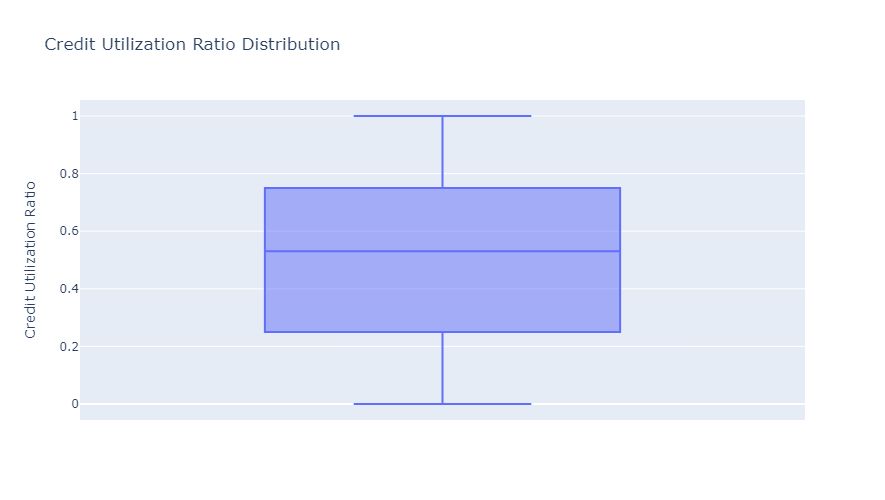

In [21]:
credit_utilization_fig = px.box(df, y='Credit Utilization Ratio',
                                title='Credit Utilization Ratio Distribution')
credit_utilization_fig.update_layout(width=500, height=500)
credit_utilization_fig.show()

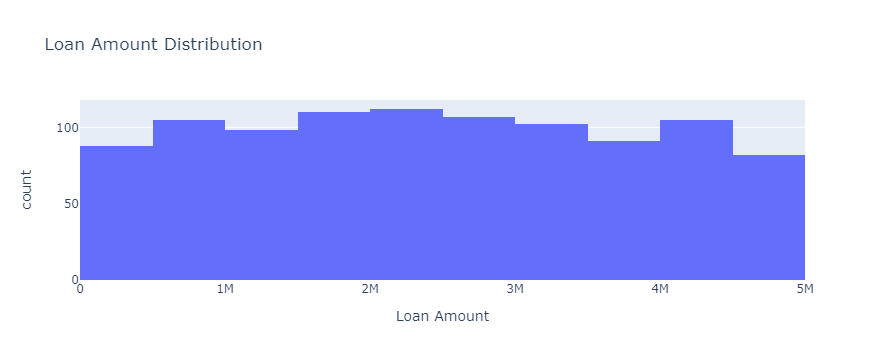

In [22]:
loan_amount_fig = px.histogram(df, x='Loan Amount', 
                               nbins=20, 
                               title='Loan Amount Distribution')
loan_amount_fig.show()

In [23]:
# Define the mapping for categorical features
education_level_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4}
employment_status_mapping = {'Unemployed': 0, 'Employed': 1, 'Self-Employed': 2}

# Apply mapping to categorical features
df['Education Level'] = df['Education Level'].map(education_level_mapping)
df['Employment Status'] = df['Employment Status'].map(employment_status_mapping)

# Calculate credit scores using the complete FICO formula
credit_scores = []

for index, row in df.iterrows():
    payment_history = row['Payment History']
    credit_utilization_ratio = row['Credit Utilization Ratio']
    number_of_credit_accounts = row['Number of Credit Accounts']
    education_level = row['Education Level']
    employment_status = row['Employment Status']

    # Apply the FICO formula to calculate the credit score
    credit_score = (payment_history * 0.35) + (credit_utilization_ratio * 0.30) + (number_of_credit_accounts * 0.15) + (education_level * 0.10) + (employment_status * 0.10)
    credit_scores.append(credit_score)

# Add the credit scores as a new column to the DataFrame
df['Credit Score'] = credit_scores

df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797


In [24]:
df['Type of Loan'].value_counts()

Type of Loan
Auto Loan        348
Home Loan        328
Personal Loan    324
Name: count, dtype: int64

In [25]:
X = df[['Credit Score']]

In [30]:
import os
os.environ["OMP_NUM_THREADS"] = "4"
import sklearn


In [31]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, n_init=10, random_state=42)
model.fit(X)
df['Segment'] = model.labels_

C:\Users\PAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [32]:
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan,Credit Score,Segment
0,60,Male,Married,3,1,0.22,2685.0,2,4675000,2.65,48,Personal Loan,940.516,3
1,25,Male,Married,1,0,0.20,2371.0,9,3619000,5.19,60,Auto Loan,831.360,3
2,30,Female,Single,3,1,0.22,2771.0,6,957000,2.76,12,Auto Loan,971.216,3
3,58,Female,Married,4,0,0.12,1371.0,2,4731000,6.57,60,Auto Loan,480.586,0
4,32,Male,Married,2,2,0.99,828.0,2,3289000,6.28,36,Personal Loan,290.797,0


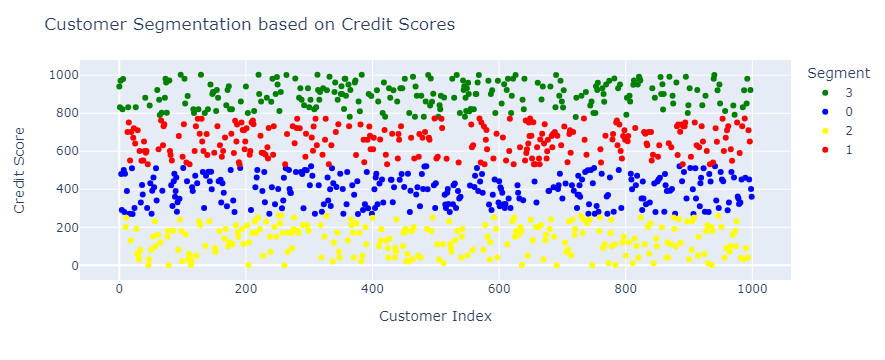

In [33]:
# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(df, x=df.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

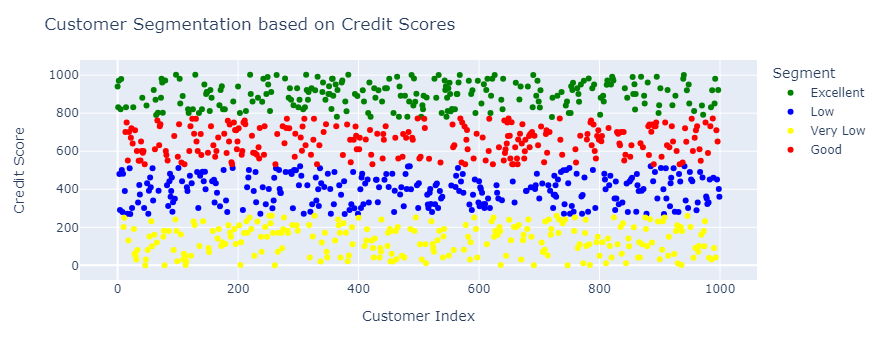

In [35]:
df['Segment'] = df['Segment'].map({    0: 'Low',
                                       2: 'Very Low',
                                       1: 'Good',
                                       3: "Excellent"})

# Convert the 'Segment' column to category data type
df['Segment'] = df['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(df, x=df.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'blue', 'yellow', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

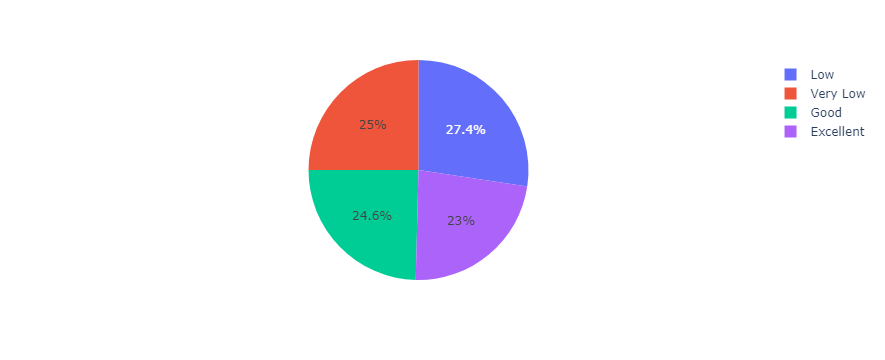

In [40]:
import plotly.express as px

# Assuming df is your DataFrame and 'Segment' is a column in it
seg_counts = df['Segment'].value_counts()

fig_pie = px.pie(seg_counts, values=seg_counts.values, names=seg_counts.index)
fig_pie.show()
